In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


Classe cat: 200 imagens
Classe cow: 200 imagens
Classe dog: 200 imagens
Classe horse: 200 imagens
Classe sheep: 200 imagens


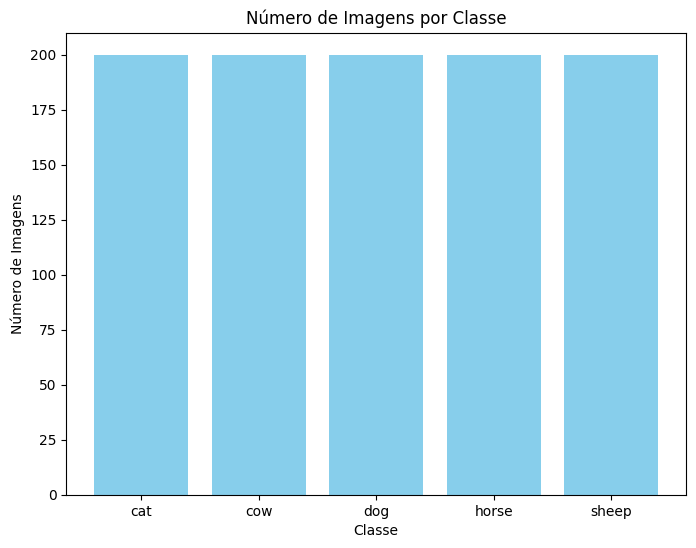

In [2]:
import os
import matplotlib.pyplot as plt

# Diretório base do dataset
imagens = '/content/drive/MyDrive/PONDERADA_HAYASHI/animalpose_image_part2'

# Classes disponíveis no dataset
classes = ['cat', 'cow', 'dog', 'horse', 'sheep']

# Dicionário para armazenar o número de imagens por classe
image_count = {}

for cls in classes:
    cls_dir = os.path.join(imagens, cls)
    num_images = len(os.listdir(cls_dir))
    image_count[cls] = num_images
    print(f'Classe {cls}: {num_images} imagens')

# Gráfico de barras
plt.figure(figsize=(8,6))
plt.bar(image_count.keys(), image_count.values(), color='skyblue')
plt.title('Número de Imagens por Classe')
plt.xlabel('Classe')
plt.ylabel('Número de Imagens')
plt.show()


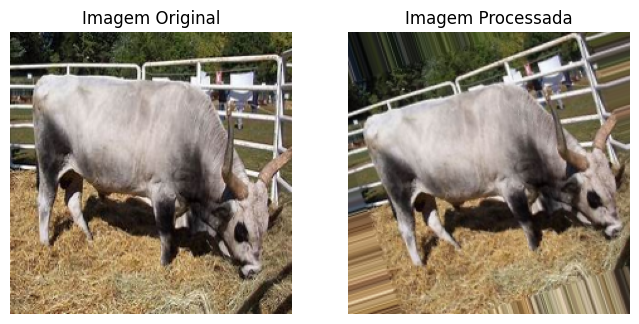

In [5]:
import os
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Diretório da classe 'cow'
bovinos = os.path.join(imagens, 'cow')

# Parâmetros para redimensionamento
img_height, img_width = 224, 224

# Instanciando o ImageDataGenerator para data augmentation
datagen = ImageDataGenerator(
    rotation_range=25,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode="nearest",
    rescale=1./255
)



# Processando cada imagem individualmente
for img_file in os.listdir(bovinos):
    img_path = os.path.join(bovinos, img_file)
    # Leitura da imagem
    img = cv2.imread(img_path)
    # Conversão de BGR para RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # Redimensionamento
    img_resized = cv2.resize(img, (img_width, img_height))
    # Expansão das dimensões para o batch
    img_expanded = np.expand_dims(img_resized, axis=0)
    # Aplicando data augmentation
    aug_iter = datagen.flow(img_expanded)
    # Obtendo uma imagem aumentada
    aug_image = next(aug_iter)[0].astype('float32')


# Exibindo uma imagem original e uma processada
plt.figure(figsize=(8,4))

# Imagem original
plt.subplot(1,2,1)
plt.imshow(img_resized)
plt.title('Imagem Original')
plt.axis('off')

# Imagem processada
plt.subplot(1,2,2)
plt.imshow(aug_image)
plt.title('Imagem Processada')
plt.axis('off')

plt.show()


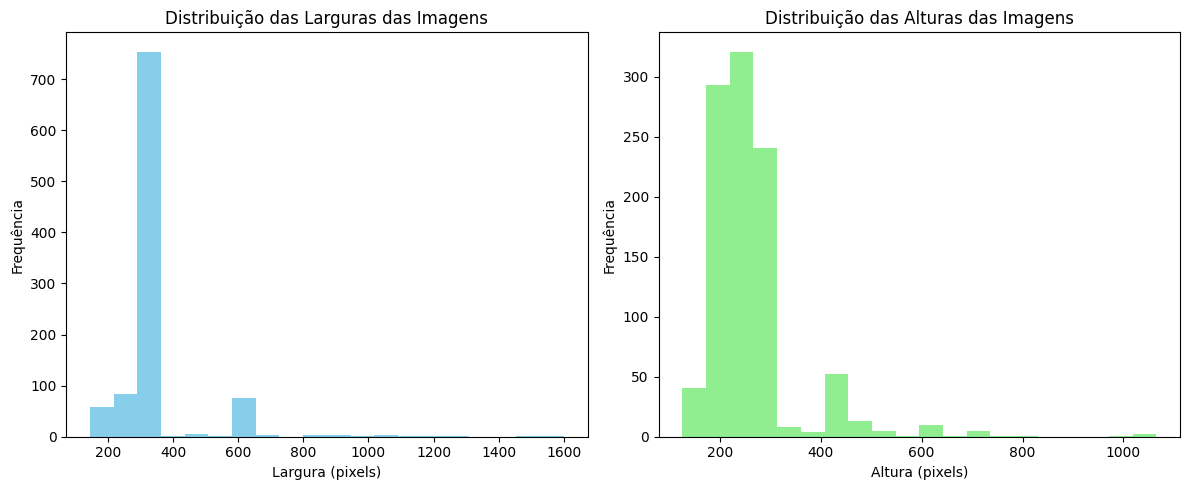

In [7]:
import numpy as np

widths = []
heights = []

for cls in classes:
    cls_dir = os.path.join(imagens, cls)
    for img_file in os.listdir(cls_dir):
        img_path = os.path.join(cls_dir, img_file)
        img = cv2.imread(img_path)
        h, w = img.shape[:2]
        widths.append(w)
        heights.append(h)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(widths, bins=20, color='skyblue')
plt.title('Distribuição das Larguras das Imagens')
plt.xlabel('Largura (pixels)')
plt.ylabel('Frequência')

plt.subplot(1,2,2)
plt.hist(heights, bins=20, color='lightgreen')
plt.title('Distribuição das Alturas das Imagens')
plt.xlabel('Altura (pixels)')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()


In [11]:
!pip install mediapipe

import os
import cv2
import numpy as np
import mediapipe as mp
from google.colab.patches import cv2_imshow
import math


In [12]:
# Parâmetros de redimensionamento
DESIRED_HEIGHT = 480
DESIRED_WIDTH = 480

# Função para redimensionar e mostrar a imagem
def resize_and_show(image):
    h, w = image.shape[:2]
    if h < w:
        img = cv2.resize(image, (DESIRED_WIDTH, math.floor(h / (w / DESIRED_WIDTH))))
    else:
        img = cv2.resize(image, (math.floor(w / (h / DESIRED_HEIGHT)), DESIRED_HEIGHT))
    cv2_imshow(img)


In [14]:
# Inicializar o MediaPipe Pose e ferramentas de desenho
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

# Função para processar imagens com MediaPipe Pose
def process_images_with_mediapipe(dataset_dir):
    with mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5, model_complexity=2) as pose:
        for img_file in os.listdir(dataset_dir):
            img_path = os.path.join(dataset_dir, img_file)
            image = cv2.imread(img_path)  # Ler a imagem

            # Converter imagem para RGB e processar com MediaPipe Pose
            results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

            # Verificar se os landmarks foram detectados
            if not results.pose_landmarks:
                continue

            # Desenhar os landmarks na imagem
            annotated_image = image.copy()
            mp_drawing.draw_landmarks(
                annotated_image,
                results.pose_landmarks,
                mp_pose.POSE_CONNECTIONS,
                landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style())

            # Exibir a imagem anotada
            resize_and_show(annotated_image)



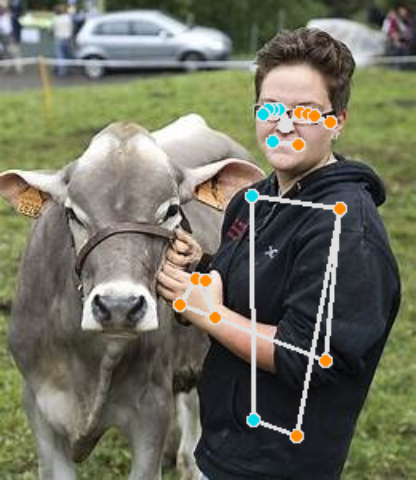

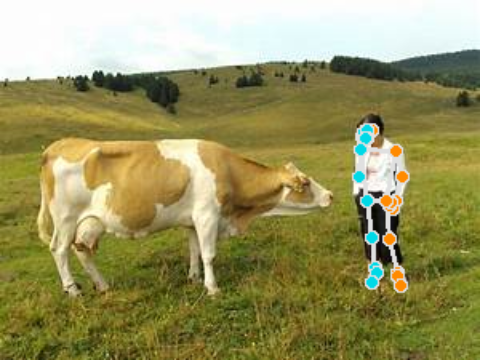

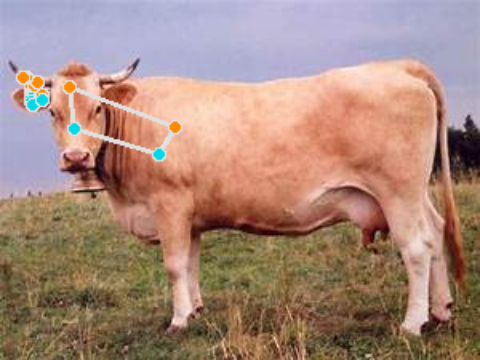

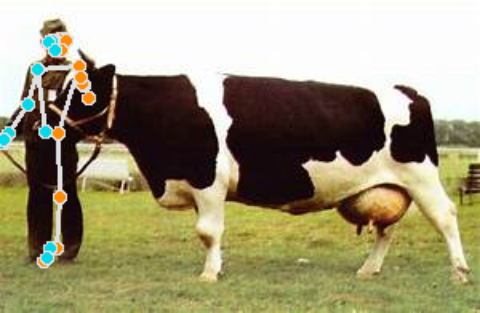

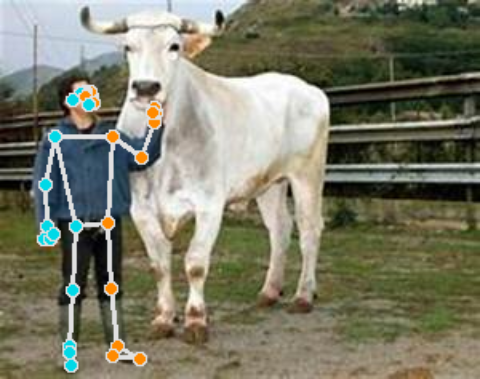

In [15]:
# Diretório contendo as imagens de bovinos (classe 'cow')
cow_dir = '/content/drive/MyDrive/PONDERADA_HAYASHI/animalpose_image_part2/cow'

# Aplicar o modelo no dataset de bovinos
process_images_with_mediapipe(cow_dir)
